### 1번 
데이터 출처 : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv 일부 전처리    
데이터 경로 : /kaggle/input/adp-kr-p3/problem1.csv     
데이터 설명 : 집과 관련된 여러 수치들과 집의 가격, log1p 정규화된 price 컬럼 예측 하기 

### 1-1 EDA 및 데이터 전처리
시각화 및 통계량 제시

In [1]:
import pandas as pd
from urllib.parse import quote

url1 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/4주차/data/problem1.csv'
encoded_url1 = quote(url1, safe=':/')

df1 = pd.read_csv(encoded_url1, encoding='utf-8')
df1.head()

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
0,1,8450,65.0,2003,856,854,2003,8,1,3,2,548,12.247699
1,2,9600,80.0,1976,1262,0,1976,6,1,3,2,460,12.109016
2,3,11250,68.0,2001,920,866,2002,6,1,3,2,608,12.317171
3,4,9550,60.0,1915,961,756,1970,7,1,3,3,642,11.849405
4,5,14260,84.0,2000,1145,1053,2000,9,1,4,3,836,12.429220


In [2]:
df1.info()
## LotFrontage 결측치 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   LotArea       1460 non-null   int64  
 2   LotFrontage   1201 non-null   float64
 3   YearBuilt     1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   2ndFlrSF      1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   KitchenAbvGr  1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  GarageCars    1460 non-null   int64  
 11  GarageArea    1460 non-null   int64  
 12  price         1460 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 148.4 KB


In [3]:
df1[df1['LotFrontage'].isnull()]

# LotFrontage의 결측치 비중이 전체 데이터의 15%이고, 전체 데이터가 많지 않으므로
# 결측치 행을 삭제할지 아니면 LotFrontage 열을 삭제할지 판단해야 함

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
7,8,10382,NaN,1973,1107,983,1973,7,1,3,2,484,12.206078
12,13,12968,NaN,1962,912,0,1962,4,1,2,1,352,11.877576
14,15,10920,NaN,1960,1253,0,1960,5,1,2,1,352,11.964007
16,17,11241,NaN,1970,1004,0,1970,5,1,2,2,480,11.911708
24,25,8246,NaN,1968,1060,0,2001,6,1,3,1,270,11.944714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,12546,NaN,1981,1440,0,1981,7,1,3,2,467,12.116700
1431,1432,4928,NaN,1976,958,0,1976,5,1,2,2,440,11.875838
1441,1442,4426,NaN,2004,848,0,2004,3,1,1,2,420,11.913720
1443,1444,8854,NaN,1916,952,0,1950,4,1,2,1,192,11.703554


<AxesSubplot:>

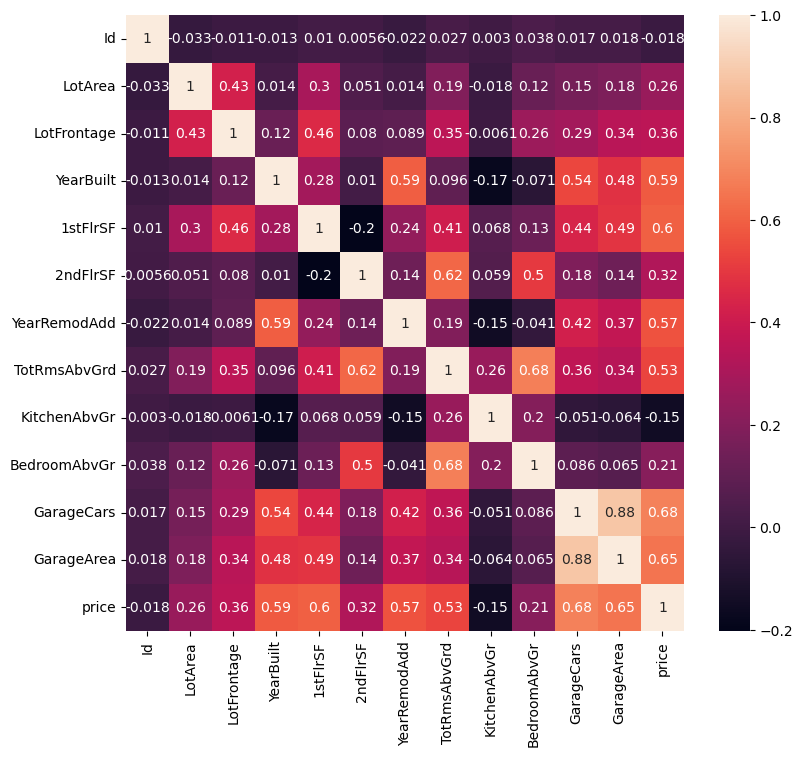

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,8))
sns.heatmap(df1.corr(), annot=True)

## price와 LotFrontage의 상관관계가 낮지 않으므로 제거를 하는 것보다 결측치 대체를 하는 것이 좋음
## LotFrontage는 거리를 의미하므로 결측치는 0으로 대체

In [5]:
df1 = df1.fillna(0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   LotArea       1460 non-null   int64  
 2   LotFrontage   1460 non-null   float64
 3   YearBuilt     1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   2ndFlrSF      1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   KitchenAbvGr  1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  GarageCars    1460 non-null   int64  
 11  GarageArea    1460 non-null   int64  
 12  price         1460 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 148.4 KB


In [6]:
df1.describe()

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,57.623288,1971.267808,1162.626712,346.992466,1984.865753,6.517808,1.046575,2.866438,1.767123,472.980137,12.024057
std,421.610009,9981.264932,34.664304,30.202904,386.587738,436.528436,20.645407,1.625393,0.220338,0.815778,0.747315,213.804841,0.399449
min,1.000000,1300.000000,0.000000,1872.000000,334.000000,0.000000,1950.000000,2.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,365.750000,7553.500000,42.000000,1954.000000,882.000000,0.000000,1967.000000,5.000000,1.000000,2.000000,1.000000,334.500000,11.775105
50%,730.500000,9478.500000,63.000000,1973.000000,1087.000000,0.000000,1994.000000,6.000000,1.000000,3.000000,2.000000,480.000000,12.001512
75%,1095.250000,11601.500000,79.000000,2000.000000,1391.250000,728.000000,2004.000000,7.000000,1.000000,3.000000,2.000000,576.000000,12.273736
max,1460.000000,215245.000000,313.000000,2010.000000,4692.000000,2065.000000,2010.000000,14.000000,3.000000,8.000000,4.000000,1418.000000,13.534474


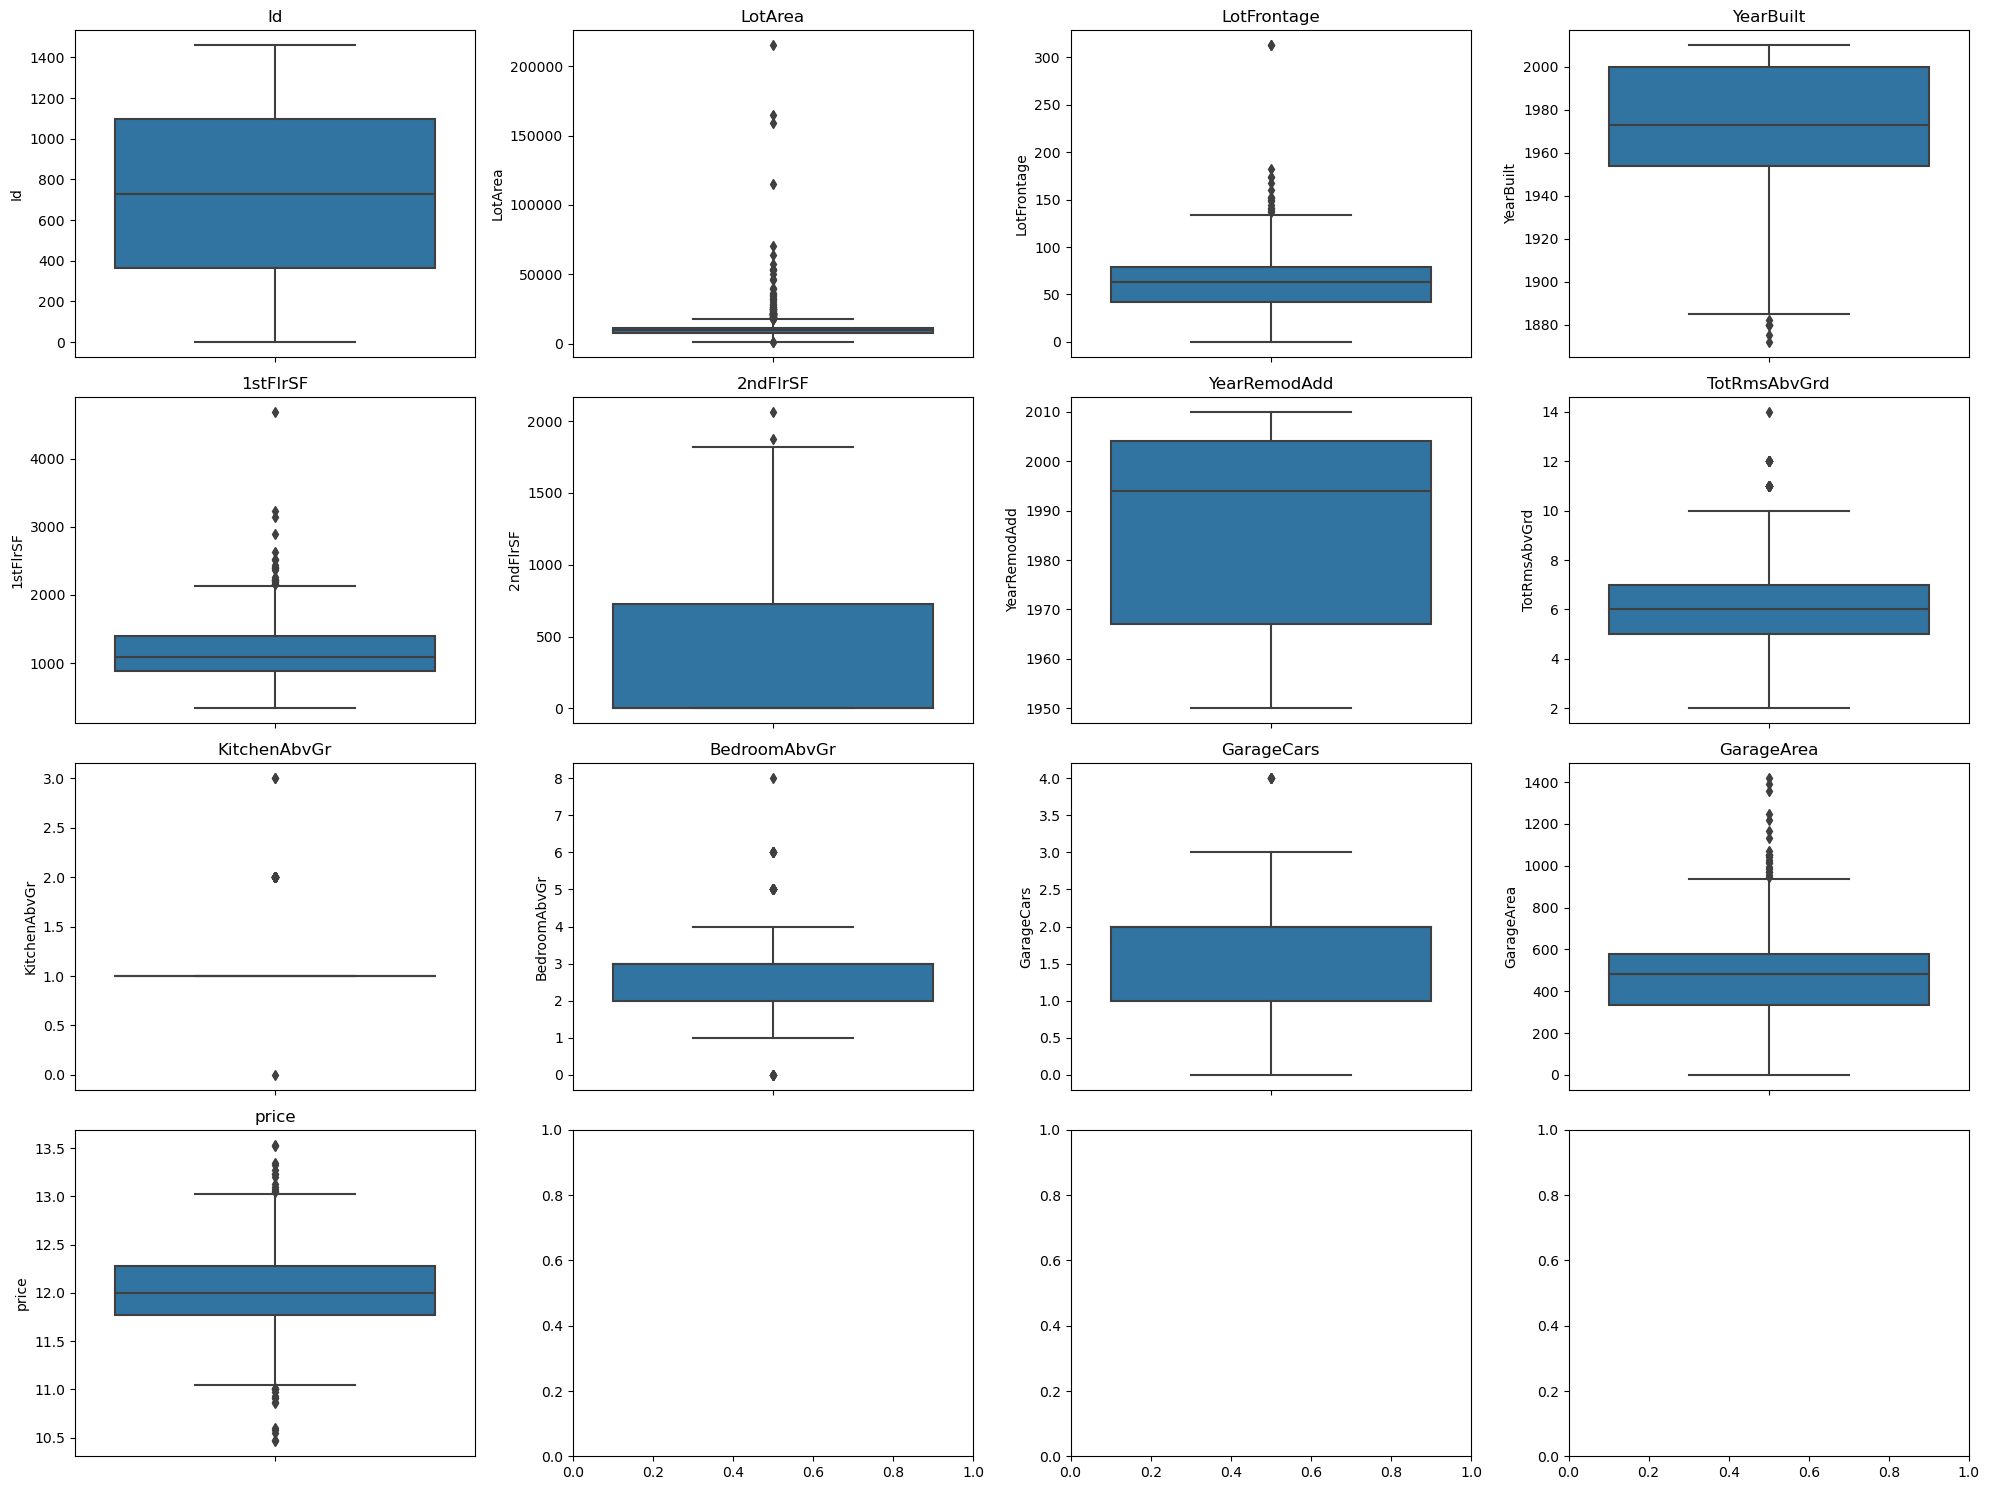

In [7]:
from math import ceil

target = 'price'
features = df1.columns.tolist()
# features.remove(target)


r,c = ceil(len(features)/4), 4
fig, axes = plt.subplots(r, c, figsize=(20, 15))
for i, column in enumerate(features):
    ax_r, ax_c = int(i//c), int(i%c)
    sns.boxplot(y=df1[column], ax = axes[ax_r][ax_c])
    axes[ax_r][ax_c].set_title(column)

plt.tight_layout()
plt.show()

In [8]:
df1[df1['LotArea'] > 100000]

## price는 차이나지 않는 데 비해 영역은 매우 넓음. 그러나 지역 변수가 없어서 명확히 outlier라 판단하기 어려움

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
249,250,159000,0.0,1958,1444,700,2006,7,1,4,2,389,12.531776
313,314,215245,150.0,1965,2036,0,1965,8,1,3,2,513,12.834684
335,336,164660,0.0,1965,1619,167,1965,7,1,3,2,529,12.341263
706,707,115149,0.0,1971,1824,0,2002,5,1,2,2,739,12.618186


### 1-2  Train,Valid,Test set으로 분할 및 시각화 제시

In [176]:
from sklearn.model_selection import train_test_split

df1 = df1.rename({'1stFlrSF':'firstFlrSF', '2ndFlrSF':'secondFlrSF'}, axis=1)
target = 'price'
featues = df1.columns.tolist()
featues.remove(target)

train_x, test_x, train_y, test_y = train_test_split(df1[featues], df1[target])

### 1-3  2차 교호작용항 까지 고려한 회귀분석 수행 및 변수 선택 과정 제시

In [178]:
from itertools import permutations 
comb = 
len(comb)

132

In [188]:
from statsmodels.formula.api import ols

max_r2 = 0
max_model = [None]
for i in range(2, len(train_x.columns)+1):
    comb = list(permutations(train_x.columns, i))
    for y in comb:
        variables= '+ '.join(list(train_x.columns)) +'+'+ '+'.join(list(y))
        res = ols(f'price ~ {variables}', data=pd.concat([train_x,train_y],axis=1)).fit()
        if max_r2 < res.rsquared:
            max_r2 = max(max_r2, res.rsquared)
            max_model[0] = (y, res)

max_model[0][0], max_model[0][1].summary()

KeyboardInterrupt: 

### 1-4 벌점(규제), 앙상블을 포함하여 모형에 적합한 기계학습 모델 3가지를 제시하라
(평가지표는 MSE, MAPE, R2 모두 확인할 것)

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_percentage_error,
    r2_score
)

rf = RandomForestRegressor(random_state=42).fit(train_x,train_y)
preds = rf.predict(test_x)

print('randomforest_MSE', mean_squared_error(preds, test_y))
print('randomforest_MAPE', mean_absolute_percentage_error(preds, test_y))
print('randomforest_R2', r2_score(preds, test_y))
print()

ls = Lasso(random_state=42).fit(train_x,train_y)
preds = ls.predict(test_x)

print('Lasso_MSE', mean_squared_error(preds, test_y))
print('Lasso_MAPE', mean_absolute_percentage_error(preds, test_y))
print('Lasso_R2', r2_score(preds, test_y))
print()

rd = Ridge(random_state=42).fit(train_x,train_y)
preds = rd.predict(test_x)

print('Ridge_MSE', mean_squared_error(preds, test_y))
print('Ridge_MAPE', mean_absolute_percentage_error(preds, test_y))
print('Ridge_R2', r2_score(preds, test_y))

randomforest_MSE 0.03534626658134106
randomforest_MAPE 0.010084577724696637
randomforest_R2 0.714414239985229

XGBoost_MSE 0.04079904266711306
XGBoost_MAPE 0.011094349440747834
XGBoost_R2 0.7097394961306276

LightGBM_MSE 0.03504541983648451
LightGBM_MAPE 0.009995970081119219
LightGBM_R2 0.734693749988233


## 2번
코로나19에 대한 나라별 데이터로 모델링 진행     
데이터 출처 : https://www.kaggle.com/imdevskp/corona-virus-report 일부 후처리    
데이터 경로 : /kaggle/input/adp-kr-p3/problem2.csv     
**컬럼**
- location : 지역명
- date : 일자
- total_cases : 누적 확인자
- total_deaths : 누적 사망자
- new_tests : 검사자
- population : 인구
- new_vaccinations : 백신 접종자

### 2-1 마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라
상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라     

In [72]:
import pandas as pd
from urllib.parse import quote

url2 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/4주차/data/problem2.csv'
encoded_url2 = quote(url2, safe=':/')

df2 = pd.read_csv(encoded_url2, encoding='utf-8').fillna(0)
df2.head()

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
0,Afghanistan,2020-02-24,5.0,0.0,0.0,39835428.0,0.0
1,Afghanistan,2020-02-25,5.0,0.0,0.0,39835428.0,0.0
2,Afghanistan,2020-02-26,5.0,0.0,0.0,39835428.0,0.0
3,Afghanistan,2020-02-27,5.0,0.0,0.0,39835428.0,0.0
4,Afghanistan,2020-02-28,5.0,0.0,0.0,39835428.0,0.0


In [97]:
df2['date'].min()
df2[df2['date'] == df2['date'].min().strftime("%Y-%m-%d")]

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,new_cases,new_deaths
4780,Argentina,2020-01-01,0.0,0.0,4.0,45605823.0,0.0,NaN,NaN
79907,Mexico,2020-01-01,0.0,0.0,25.0,130262220.0,0.0,NaN,NaN
97457,Peru,2020-01-01,0.0,0.0,2.0,33359415.0,0.0,NaN,NaN


In [107]:
df2['date'] = pd.to_datetime(df2['date'])
l_grouped = df2.groupby('location')
df2['new_cases'] = l_grouped['total_cases'].diff()
df2['new_deaths'] = l_grouped['total_deaths'].diff()
df2['ratio'] = round(df2['total_cases'] / df2['population'], 5)

for l in df2['location'].unique():
    tmp_df = df2[df2['location'] == l]
    tmp_df = tmp_df[tmp_df['date'] == tmp_df['date'].min().strftime("%Y-%m-%d")]
    df2.loc[tmp_df.index, 'new_cases'] = tmp_df['total_cases']
    df2.loc[tmp_df.index, 'new_deaths'] = tmp_df['total_deaths']
df2.head()

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,new_cases,new_deaths,ratio
0,Afghanistan,2020-02-24,5.0,0.0,0.0,39835428.0,0.0,5.0,0.0,0.0
1,Afghanistan,2020-02-25,5.0,0.0,0.0,39835428.0,0.0,0.0,0.0,0.0
2,Afghanistan,2020-02-26,5.0,0.0,0.0,39835428.0,0.0,0.0,0.0,0.0
3,Afghanistan,2020-02-27,5.0,0.0,0.0,39835428.0,0.0,0.0,0.0,0.0
4,Afghanistan,2020-02-28,5.0,0.0,0.0,39835428.0,0.0,0.0,0.0,0.0


In [108]:
grouped = df2.groupby(['location']).tail(1)
grouped

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,new_cases,new_deaths,ratio
645,Afghanistan,2021-11-30,157289.0,7308.0,0.0,3.983543e+07,0.0,29.0,0.0,0.00395
1302,Africa,2021-11-30,8652562.0,222881.0,0.0,1.373486e+09,0.0,8181.0,143.0,0.00630
1947,Albania,2021-11-30,199945.0,3096.0,0.0,2.872934e+06,0.0,195.0,4.0,0.06960
2592,Algeria,2021-11-30,210531.0,6071.0,0.0,4.461663e+07,0.0,187.0,7.0,0.00472
3231,Andorra,2021-11-30,17115.0,131.0,0.0,7.735400e+04,0.0,403.0,0.0,0.22126
...,...,...,...,...,...,...,...,...,...,...
134407,Wallis and Futuna,2021-11-22,0.0,0.0,0.0,1.109400e+04,0.0,0.0,0.0,0.00000
135086,World,2021-11-30,262797494.0,5215291.0,0.0,7.874966e+09,0.0,615787.0,7704.0,0.03337
135686,Yemen,2021-11-30,10004.0,1950.0,0.0,3.049064e+07,0.0,9.0,1.0,0.00033
136309,Zambia,2021-11-30,210169.0,3667.0,0.0,1.892066e+07,0.0,19.0,0.0,0.01111


In [109]:
sorted_grouped = grouped.sort_values('ratio', ascending=False) # International은 국가가 없는 경우(배에서 확진 등)이므로 제외
sorted_grouped

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,new_cases,new_deaths,ratio
58046,International,2021-11-30,721.0,15.0,0.0,0.0,0.0,0.0,0.0,inf
83449,Montenegro,2021-11-30,157376.0,2307.0,0.0,628051.0,0.0,291.0,7.0,0.25058
108918,Seychelles,2021-11-30,23417.0,125.0,0.0,98910.0,0.0,27.0,0.0,0.23675
3231,Andorra,2021-11-30,17115.0,131.0,0.0,77354.0,0.0,403.0,0.0,0.22126
111048,Slovakia,2021-11-30,1170200.0,14418.0,0.0,5460726.0,0.0,10433.0,77.0,0.21429
...,...,...,...,...,...,...,...,...,...,...
41882,Faeroe Islands,2021-11-05,0.0,0.0,0.0,49053.0,0.0,0.0,0.0,0.00000
30699,Curacao,2021-11-27,0.0,0.0,0.0,164796.0,488.0,0.0,0.0,0.00000
27916,Cook Islands,2021-11-08,0.0,0.0,0.0,17572.0,0.0,0.0,0.0,0.00000
110413,Sint Maarten (Dutch part),2021-11-29,0.0,0.0,0.0,43421.0,0.0,0.0,0.0,0.00000


In [110]:
top5_locations = sorted_grouped['location'].head(6).values.tolist()[1:]
top5_locations

['Montenegro', 'Seychelles', 'Andorra', 'Slovakia', 'Georgia']

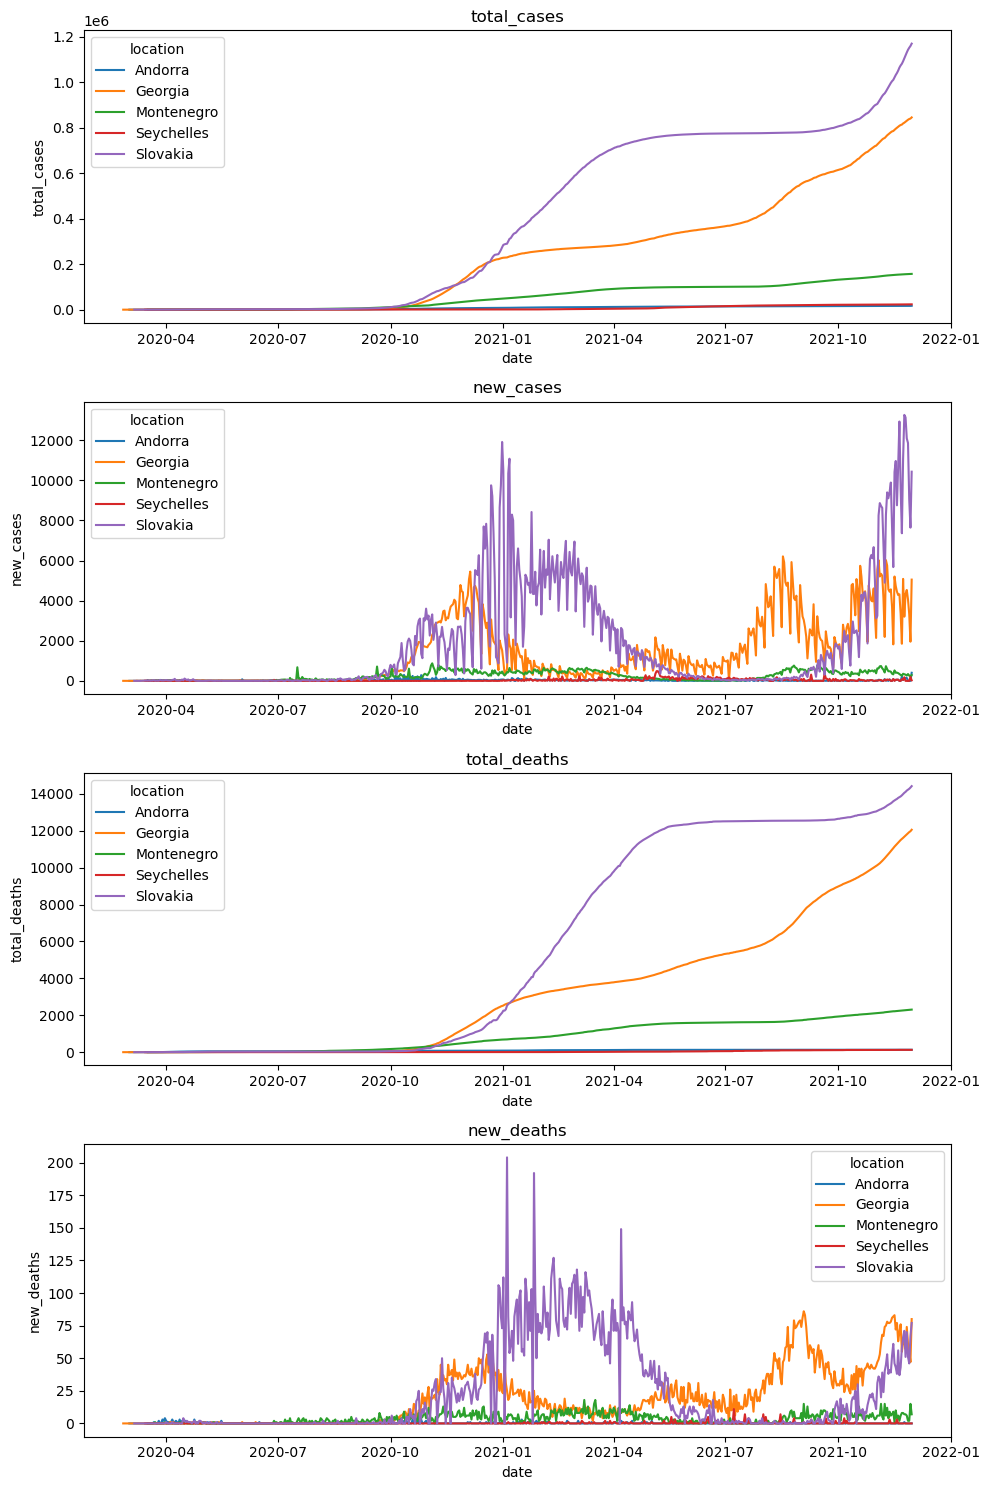

In [114]:
data = df2[df2['location'].isin(top5_locations)]
title_dict = {
    'total_cases' : '누적 확진자',
    'new_cases' : '일일 확진자',
    'total_deaths' : '누적 사망자',
    'new_deaths' : '일일 사망자'
}
fig, axes = plt.subplots(len(title_dict),1,figsize=(10,15))

for i, column in enumerate(title_dict):
    sns.lineplot(data=data, x='date', y=column, hue='location', ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

### 2-2 코로나 위험지수를 직접 만들고 그 위험지수에 대한 설명을 적고 위험지수가 높은 국가들 10개를 선정해서 시각화

코로나의 위험지수를 만들기 위해서 코로나가 다른 사람들에게 영향을 얼마나 미칠지를 고려하기 위해 확진자 증감률을 고려해야 한다.

반면, 코로나의 치명적인 정도가 낮다면 확산이 되어도 큰 타격이 없으므로 사망률과 백신 접종률을 고려한다.

또한 그래프를 보면 지수함수의 그래프 모양을 가지고 있으므로 비선형을 가정하고 지수를 산출한다.

In [116]:
df2['new_case'] / df2['population'] + df2['new_deaths'] / df2['population'] - df2['total_vacciantions'] / df2['population']*0.001

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,new_cases,new_deaths,ratio,total_vaccinations,critical,cautious
0,Afghanistan,2020-02-24,5.0,0.0,0.0,39835428.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN
1,Afghanistan,2020-02-25,5.0,0.0,0.0,39835428.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0
2,Afghanistan,2020-02-26,5.0,0.0,0.0,39835428.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,Afghanistan,2020-02-27,5.0,0.0,0.0,39835428.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,Afghanistan,2020-02-28,5.0,0.0,0.0,39835428.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [117]:
df2['cautious']

0              NaN
1        -0.000000
2              NaN
3              NaN
4              NaN
            ...   
136926    4.287444
136927   -3.407999
136928         inf
136929    4.713775
136930    1.576549
Name: cautious, Length: 136931, dtype: float64

### 2-3 한국의 코로나 신규 확진자 예측해라(선형 시계열모델 + 비선형시계열 모델 각각 한개씩 만들어라)

In [145]:
ko = df2[df2['location'] =='South Korea'].reset_index(drop=True)
ko['date'] = pd.DatetimeIndex(ko['date'])
ko = ko.set_index('date')
ko = ko['new_cases']
ko

date
2020-01-21       0.0
2020-01-22       1.0
2020-01-23       0.0
2020-01-24       1.0
2020-01-25       0.0
               ...  
2021-11-26    4067.0
2021-11-27    3928.0
2021-11-28    3304.0
2021-11-29    3030.0
2021-11-30    5120.0
Name: new_cases, Length: 680, dtype: float64

In [146]:
# 정상성 검정

from statsmodels.tsa.stattools import adfuller

result = adfuller(ko, autolag='AIC')
print(f'ADF Statistics {result[0]} p-value : {result[1]}') # 단위근 존재, 비정상 시계열

ADF Statistics 2.201089673177964 p-value : 0.9988834004027556


In [147]:
ko_diff = ko.diff().iloc[1:]

result = adfuller(ko_diff, autolag='AIC')
print(f'ADF Statistics {result[0]} p-value : {result[1]}') # 단위근 존재 X, 정상 시계열

ADF Statistics -3.6302692728039836 p-value : 0.0052080253568378915


In [148]:
# 자기상관성 검정

from statsmodels.stats.stattools import durbin_watson

durbin_watson(ko_diff) # 0 음의 상관 / 2 상관 x / 4 양의 상관

1.8539310731459677

/opt/homebrew/Caskroom/miniforge/base/envs/adp/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


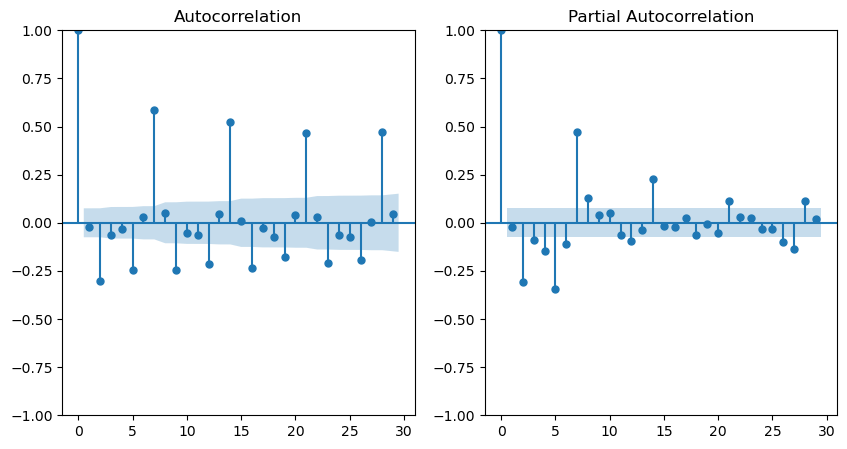

In [160]:
# 최적의 lag 결정

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_acf(ko_diff, ax = ax[0])
plot_pacf(ko_diff, ax = ax[1])
plt.show()
# 계졀성 존재

                            AutoReg Model Results                             
Dep. Variable:              new_cases   No. Observations:                  679
Model:                     AutoReg(1)   Log Likelihood               -4494.887
Method:               Conditional MLE   S.D. of innovations            183.220
Date:                Sat, 27 May 2023   AIC                           8993.774
Time:                        16:56:42   BIC                           9002.812
Sample:                    01-23-2020   HQIC                          8997.273
                         - 11-30-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
new_cases.L1    -0.0283      0.043     -0.662      0.508      -0.112       0.055
                                    Roots                                    
                  Real          Imaginary      

/opt/homebrew/Caskroom/miniforge/base/envs/adp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/adp/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:1064: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(lag_repr) ** -1
/opt/homebrew/Caskroom/miniforge/base/envs/adp/lib/python3.7/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


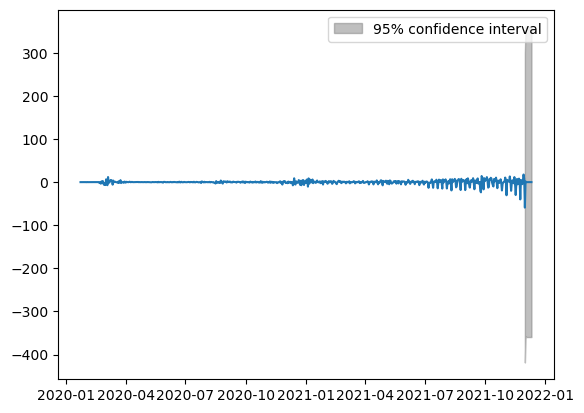

In [164]:
from statsmodels.tsa.ar_model import AutoReg


mod = AutoReg(ko_diff, lags=1, trend='n', old_names=False)
res = mod.fit()
print(res.summary())
fig = res.plot_predict(1, len(ko_diff)+10)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.62799D+00    |proj g|=  1.12502D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   1.999D-05   6.628D+00
  F =   6.6278057368548140     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Forecast: 2021-12-01   -94.341664
2021-12-02    40.052583
2021-12-03    15.162628
Freq: D, Name: predicted_mean, dtype: float64


/opt/homebrew/Caskroom/miniforge/base/envs/adp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/adp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


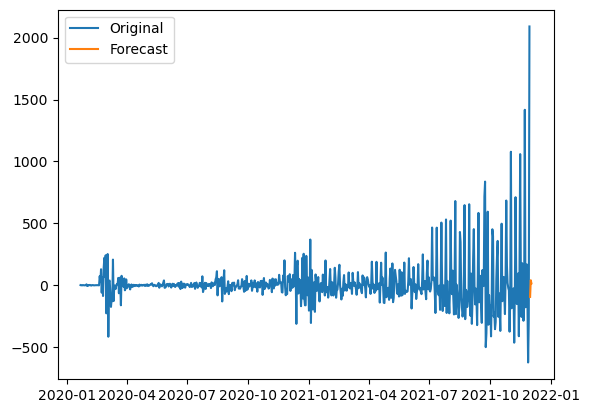

In [166]:
import statsmodels.api as sm

# SARIMA 모델 생성과 훈련
model = sm.tsa.SARIMAX(ko_diff, order=(1, 0, 0), seasonal_order=(1, 0, 0, 4))
results = model.fit()

# 예측
forecast = results.get_forecast(steps=3)  # 3 단계 예측

# 예측 결과 출력
forecast_values = forecast.predicted_mean
print("Forecast:", forecast_values)

plt.plot(ko_diff, label='Original')  # 원래 값
plt.plot(forecast_values, label='Forecast')  # 예측 값
plt.legend()
plt.show()

## 3번
설문조사 데이터      
데이터 출처 : 자체 제작    
데이터 경로 : /kaggle/input/adp-kr-p3/problem3.csv 

데이터 설명 : A ~ D까지의 그룹에게 각각 같은 설문조사를 하여 1-1,1-2,1-3...5-1,5-4 인 설문지를 푼 것이다. 문항은 영역별로 나뉘어 있고, 영역은 크게 5개이다(1~5)    
각 영역의 세부문항은 4개씩 존재한다 (1-1,1-2,1-3,1-4 ~) 이 때 중간에 반대 문항이 들어가 있다. 예를 들어 1-1 문제가 "나는 시간약속을 잘 지킨다."라는 문제라면 1-3의 문제는 "나는 시간약속을 잘 지키지 않는다." 라는 역문제로 구성 되어있다. 각 영역의 3번문항의 1번문항의 역문제이다. 
모든 답변은 5점 척도이다. 문제를 풀기전 모든 역문항의 경우 점수를 변환(6점을 빼서) 작업이 필요하다

### 3-1 역문항을 변환 한 후 각 그룹`(A~D)`의 영역`(Q1~Q5)`별 응답의 평균, 표준편차, 왜도, 첨도를 구하라. (각 통계량 별로 4x5 dataframe 생성)

In [20]:
import pandas as pd
from urllib.parse import quote

url3 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/4주차/data/problem3.csv'
encoded_url3 = quote(url3, safe=':/')

df3 = pd.read_csv(encoded_url3, encoding='utf-8')
df3.head()

,userid,group,Q1-1,Q1-2,Q1-3,Q1-4,Q2-1,Q2-2,Q2-3,Q2-4,...,Q3-3,Q3-4,Q4-1,Q4-2,Q4-3,Q4-4,Q5-1,Q5-2,Q5-3,Q5-4
0,0,A,5,2,1,2,4,5,3,3,...,1,1,5,2,5,3,3,4,3,4
1,1,A,2,2,3,3,4,3,1,4,...,2,3,4,3,5,3,1,2,1,1
2,2,A,1,3,4,4,2,1,4,4,...,4,2,1,3,4,1,3,3,2,5
3,3,A,3,3,4,2,2,4,4,3,...,2,3,3,4,2,4,1,1,3,2
4,4,A,3,1,2,3,4,3,4,1,...,5,1,3,2,3,1,3,2,5,4


In [23]:
import pandas as pd

for q_n in range(1, 6):
    df3[f'Q{q_n}-3'] = 6 - df3[f'Q{q_n}-3']
df3

def make_pivot_table(df:pd.DataFrame) -> pd.DataFrame:
    len_Q = 5
    len_P = 4
    group = []
    for _ in range(len_P):
        group.extend(list(df.group))
        
    merge_df = pd.DataFrame({'group':group})
    for num in range(1,len_Q+1):
        merge_df[f'Q{num}'] = sum([list(df[f'Q{num}-{col}'].values) for col in range(1, len_P+1)], [])


    agg_function = ['mean', 'std', 'skew', pd.DataFrame.kurt]
    grouped = merge_df.pivot_table(
        index = 'group',
        values = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
        aggfunc = {f'Q{n}':agg_function for n in range(1, len_Q+1)}
    )
    
    return grouped

make_pivot_table(df3)

Q1                                   Q2                   \
           kurt   mean      skew       std      kurt   mean      skew   
group                                                                   
A     -1.095162  2.984 -0.065283  1.263860 -1.019395  2.990 -0.069746   
B     -1.047102  2.970 -0.084167  1.242837 -1.073471  3.004 -0.093300   
C     -1.037586  2.996 -0.048687  1.243998 -1.048401  3.049 -0.131877   
D     -1.093624  2.923 -0.025453  1.262008 -1.064374  2.975 -0.099610   

                       Q3                                   Q4         \
            std      kurt   mean      skew       std      kurt   mean   
group                                                                   
A      1.238319 -1.103552  2.972 -0.065358  1.268395 -1.014232  3.059   
B      1.267119 -1.063828  2.964 -0.092818  1.239452 -1.035397  2.951   
C      1.257052 -1.000808  2.985 -0.104637  1.248332 -1.106012  2.992   
D      1.252974 -1.061711  2.942 -0.009225  1.254675 -1.034485  3.000   

                                 Q5                             
           skew       std      kurt   mean      skew       std  
group                                                           
A     -0.151060  1.255028 -1.059727  3.038 -0.116943  1.258626  
B     -0.064673  1.240217 -1.084950  2.963 -0.047605  1.271711  
C     -0.113114  1.283582 -1.059189  3.023 -0.136564  1.260182  
D     -0.070333  1.271069 -1.071532  2.933 -0.058391  1.249028

### 3-2 그룹별로 Q1-1문항의 차이가 존재하는지 anova분석을 시행하라

<AxesSubplot:xlabel='group', ylabel='Q1-1'>

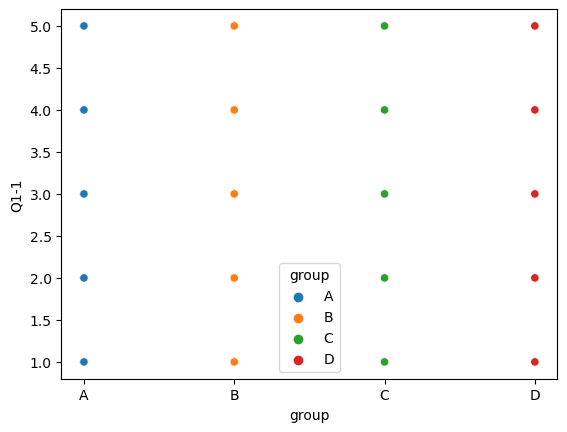

In [25]:
import seaborn as sns

sns.scatterplot(data=df3, x='group', y='Q1-1', hue='group')

In [26]:
import scipy.stats as stats

def ANOVA_Normality_Test(df, standard, target):
    '''
        H0 : standard column에서 target 데이터에 대한 평균은 모두 같다.
        H1 : 적어도 하나의 standard column의 그룹에서 평균값에 차이가 존재한다.
    '''
    target_data = [df[df[standard] == g][target] for g in df[standard].unique()]
    
    significance_level = []
    for i, group in enumerate(target_data):
        result = stats.shapiro(group)
        significance_level.append(False if result[1] < 0.05 else True)
        print(f'{i+1} ShapiroResult p-value', round(result[1], 3))

    print('accept the null hypothesis' if any(significance_level) else 'reject the null hypothesis')

ANOVA_Normality_Test(df3, standard='group', target='Q1-1')

1 ShapiroResult p-value 0.0
2 ShapiroResult p-value 0.0
3 ShapiroResult p-value 0.0
4 ShapiroResult p-value 0.0
reject the null hypothesis


In [27]:
def Kruskal_Test(df, standard, target):
    target_data = [df[df[standard] == g][target] for g in df[standard].unique()]
    print(stats.kruskal(*target_data))

Kruskal_Test(df3, standard='group', target='Q1-1')

KruskalResult(statistic=4.567127187870985, pvalue=0.20638028098088249)


### 3-3 탐색적 요인분석을 수행하고 결과를 시각화 하라

## 탐색적 요인 분석
- 요인 분석(FA)은 관찰된 변수 집합에서 영향력있는 기본 요인 또는 잠재 변수들을 검색하는 데 사용되는 탐색적 데이터 분석 방법이다.
- 변수 수를 줄여서 데이터 해석에 도움을 준다.
- 모든 변수에서 최대 공분산을 추출하여 공통 점수에 넣는다.
- 요인 분석은 시장 조사, 광고, 심리학, 금융 및 운영 연구에 널리 사용됨
- 예를 들어, 시장 조사원은 요인 분석을 사용하여 가격에 민감한 고객을 식별하고 소비자 선택에 영향을 미치는 브랜드 기능을 식별하며 유통 채널에 대한 채널 선택 기준을 이해하는 데 도움을 준다.

## 탐색적 요인 분석의 전제조건
- 등간척도, 정규분포, 관찰치가 상호독립적이며 분산이 동일해야 한다.
- 모상관 행렬이 단위 행렬이라는 가설이 기각되어야 함(KMO / Bartleet의 검정)
- 최초 요인 추출 단계에서 얻은 고유치를 scree chart로 표현했을 때, 한군데 이상 꺾이는 곳이 있어야 함
- 변수간에 높은 상관관계가 있어야 한다.(상관관계가 높은 변수들끼리 그룹화하는 것이기 때문)

## 탐색적 요인 분석 방법
- 변수간의 상관행렬로부터 공통요인을 도출한다.
- 도출된 공통요인을 이용해서 변수간의 상관관계를 설명한다.
- 요인부하량은 플러스 마이너스 0.3 이상이면 유의하다고 본다.

## 탐색적 요인 분석의 목적
1. 자료의 요약 : 변수들을 몇개의 공통된 변인으로 묶는다.
2. 출정도구 타당성 검정 : 변인들이 동일한 요인으로 묶이는지를 확인
3. 변인구조 파악 : 변수들의 상호관계를 파악
4. 불필요한 변인 제거 : 중요도나 설명력이 낮은 변수를 제거한다.
5. 회귀분석이나 판별분석의 설명변수 선택

## PCA와의 차이점
- PCA 성분은 최대 분산량을 설명하는 반면 요인 분석은 데이터의 공분산을 설명
- PCA 구성 요소는 서로 완전히 직교하는 반면 요인 분석에서는 요인이 꼭 직교하는 것은 아니다.
- PCA 성분은 관찰된 변수의 선형 조합이지만, FA에서 관찰된 변수는 관찰되지 않은 변수 또는 요인의 선형 조합이다.
- PCA 구성 요소는 해석할 수 없지만, FA에서 기본 요소는 라벨링 및 해석할 수 있따.
- PCA는 일종의 차원 감소 방법이며 요인 분석은 잠재 변수 방법이다.
- PCA는 관찰이지만 FA는 모델링 기술입니다.

In [31]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

df_f =  df3.drop(['userid', 'group'], axis=1)
chi_square_value, p_value=calculate_bartlett_sphericity(df_f)

print(p_value)
print('accept the null hypothesis' if p_value < 0.05 else 'reject the null hypothesis')

0.12271947500306984
reject the null hypothesis


In [32]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_f)
print('accept the null hypothesis' if kmo_model >= 0.6 else 'reject the null hypothesis')

reject the null hypothesis


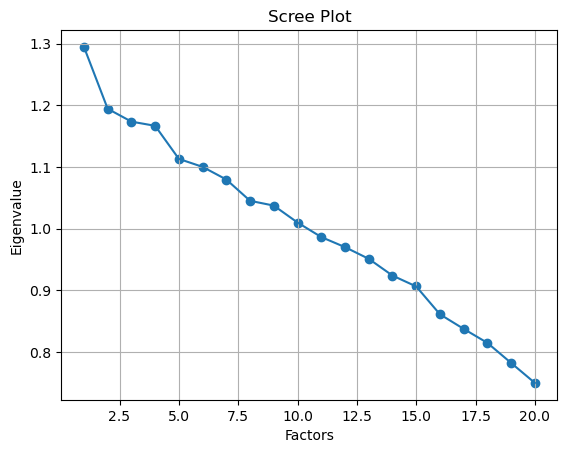

In [33]:
import matplotlib.pyplot as plt

fa = FactorAnalyzer(n_factors=25,rotation=None)
fa.fit(df_f)
#Eigen값 체크 
ev, v = fa.get_eigenvalues()
plt.scatter(range(1,df_f.shape[1]+1),ev)
plt.plot(range(1,df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

<AxesSubplot:>

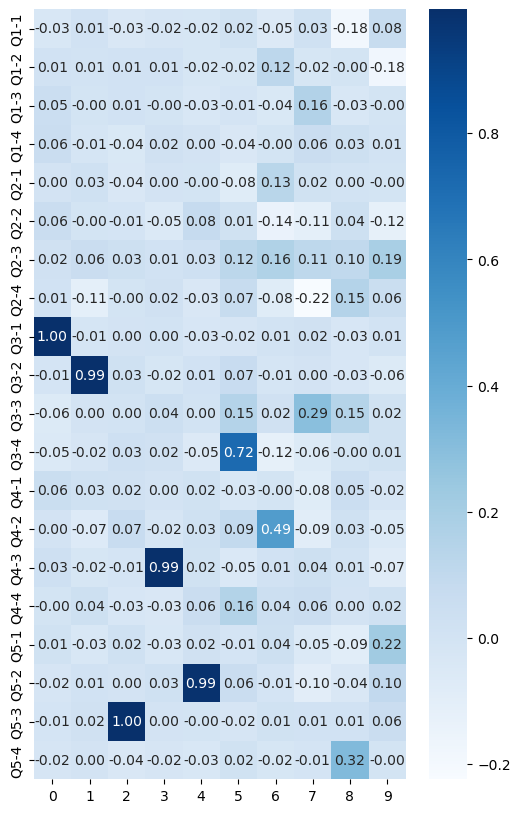

In [34]:
fa = FactorAnalyzer(n_factors=10, rotation="varimax") #ml : 최대우도 방법
fa.fit(df_f)
efa_result= pd.DataFrame(fa.loadings_, index=df_f.columns)
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')